In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mw_pw_profiles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83020 entries, 0 to 83019
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              83020 non-null  object 
 1   match_id               83020 non-null  object 
 2   gender                 83020 non-null  object 
 3   balls_per_over         83020 non-null  int64  
 4   start_date             83020 non-null  object 
 5   series_name            82638 non-null  object 
 6   match_type             83020 non-null  object 
 7   name_x                 83020 non-null  object 
 8   runs_scored            83020 non-null  int64  
 9   player_out             83020 non-null  int64  
 10  balls_faced            83020 non-null  int64  
 11  fours_scored           83020 non-null  int64  
 12  sixes_scored           83020 non-null  int64  
 13  catches_taken          83020 non-null  int64  
 14  run_out_direct         83020 non-null  int64  
 15  ru

In [30]:
cols_batting = ['runs_scored', 'balls_faced', 'fours_scored', 'sixes_scored']
cols_bowling = ['balls_bowled', 'runs_conceded', 'wickets_taken', 'lbw_done', 'dot_balls_as_bowler', 'bowled_done', 'maidens',]

In [4]:
cols = ['balls_bowled', 'runs_conceded', 'wickets_taken', 'lbw_done', 'dot_balls_as_bowler', 'bowled_done', 'maidens','runs_scored', 'balls_faced', 'fours_scored', 'sixes_scored']

In [6]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
df_normalised = mMscaler.fit_transform(df[cols])
print(df_normalised)


[[0.         0.         0.         ... 0.05272408 0.01754386 0.        ]
 [0.         0.         0.         ... 0.03163445 0.01754386 0.        ]
 [0.         0.         0.         ... 0.00878735 0.         0.        ]
 ...
 [0.04195804 0.08695652 0.         ... 0.01230228 0.03508772 0.05882353]
 [0.04195804 0.12771739 0.         ... 0.         0.         0.        ]
 [0.04545455 0.13315217 0.07142857 ... 0.01230228 0.         0.        ]]


In [8]:
X = df_normalised
y = df['fantasy_score_total']

In [13]:

def relu(z):
    return np.maximum(0, z)
def relu_derivative(z):
    return (z > 0).astype(float)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / (y_true.size)

In [27]:
# assumption: single layered NN

def train_nn(X,y,hidden_size):

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  y_train = y_train.values.reshape(-1, 1)
  y_test = y_test.values.reshape(-1, 1)

  input_size = X.shape[1]
  output_size = 1

# Random Initialisation of weights and biases
  np.random.seed(0)
  W1 = np.random.randn(input_size, hidden_size) * 0.01
  b1 = np.zeros((1, hidden_size))

  W2 = np.random.randn(hidden_size, output_size) * 0.01
  b2 = np.zeros((1, output_size))


  epochs = 2000
  lr = 0.01

  for epoch in range(epochs):
    Z1 = np.dot(X_train, W1)+b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2)+b2
    y_pred = Z2

  # loss:
    loss = mse(y_train, y_pred)

  ### backpropagation

  # basic formula: W1 = W1 - lr* (dcost/dw1)   --> (partial derivative)
  # breaking dcost/dw1 = dcost / dy_pred * dypred / da1 * drelu(Z1)/dZ1 * d(Z1)/dw1

    dZ2 = mse_derivative(y_train, y_pred)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X_train.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)


  # --- Update weights ---
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 100 == 0:
      print(f"Epoch {epoch}, Loss: {loss:.4f}")
  print(f"Model ready!  |  Loss: {loss:.4f}")

  y_test_pred = np.dot(X_test,W1) + b1
  y_test_pred = np.dot(relu(y_test_pred), W2) + b2

  Z1_test = X_test.dot(W1) + b1
  A1_test = relu(Z1_test)
  y_test_pred = A1_test.dot(W2) + b2

  test_loss = mse(y_test, y_test_pred)
  print(f"Test MSE: {test_loss:.4f}")


  sns.scatterplot(x=y_test.flatten(), y=y_test_pred.flatten())
  plt.xlabel('Actual Score')
  plt.ylabel('Predicted Score')
  plt.title('Actual vs. Predicted Scores')
# Diagonal line = perfect prediction
  plt.plot((x:=np.linspace(-10,500)), x , color='red');

  plt.xlabel('Actual Score')
  plt.ylabel('Predicted Score')
  plt.title('Actual vs. Predicted Scores')
  plt.show()


Epoch 0, Loss: 3785.9563
Epoch 100, Loss: 1923.6122
Epoch 200, Loss: 1793.0197
Epoch 300, Loss: 1279.3874
Epoch 400, Loss: 427.4761
Epoch 500, Loss: 349.3818
Epoch 600, Loss: 254.1005
Epoch 700, Loss: 234.9887
Epoch 800, Loss: 186.0391
Epoch 900, Loss: 164.2743
Model ready!  |  Loss: 128.9361
Test MSE: nan


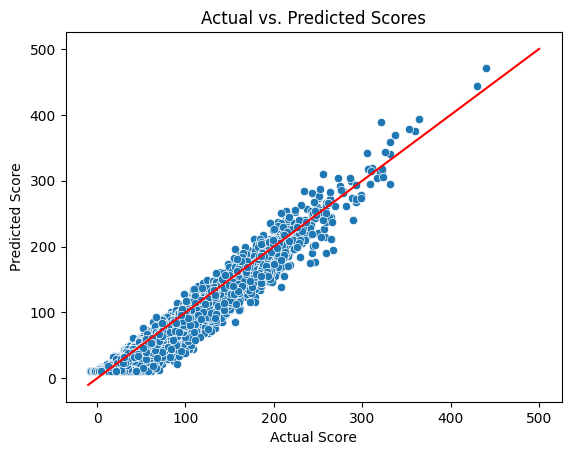

In [28]:
train_nn(X,y,8)

Applying the same for Batting and bowling scores individually:

In [31]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
df_batting_normalised = mMscaler.fit_transform(df[cols_batting])
print(df_batting_normalised)


[[0.02645503 0.05272408 0.01754386 0.        ]
 [0.02116402 0.03163445 0.01754386 0.        ]
 [0.0026455  0.00878735 0.         0.        ]
 ...
 [0.04232804 0.01230228 0.03508772 0.05882353]
 [0.         0.         0.         0.        ]
 [0.00793651 0.01230228 0.         0.        ]]


In [32]:
X = df_batting_normalised
y = df['fantasy_score_batting']

Epoch 0, Loss: 1501.1584
Epoch 100, Loss: 48.8528
Epoch 200, Loss: 110.1345
Epoch 300, Loss: 65.1923
Epoch 400, Loss: 37.0239
Epoch 500, Loss: 28.7388
Epoch 600, Loss: 31.4515
Epoch 700, Loss: 19.6119
Epoch 800, Loss: 26.0781
Epoch 900, Loss: 19.9108
Model ready!  |  Loss: 16.7346
Test MSE: nan


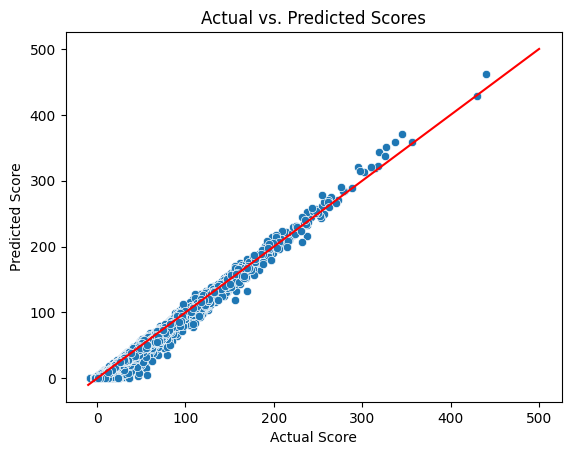

In [34]:
train_nn(X,y,3)

In [35]:
from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
df_bowling_normalised = mMscaler.fit_transform(df[cols_bowling])
print(df_bowling_normalised)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.04195804 0.08695652 0.         ... 0.02511416 0.         0.        ]
 [0.04195804 0.12771739 0.         ... 0.02054795 0.         0.        ]
 [0.04545455 0.13315217 0.07142857 ... 0.02968037 0.         0.        ]]


In [36]:
X = df_bowling_normalised
y = df['fantasy_score_bowling']

Epoch 0, Loss: 1410.1373
Epoch 100, Loss: 131.9656
Epoch 200, Loss: 84.0003
Epoch 300, Loss: 114.8421
Epoch 400, Loss: 92.4872
Epoch 500, Loss: 85.5219
Epoch 600, Loss: 82.1616
Epoch 700, Loss: 80.0592
Epoch 800, Loss: 78.5711
Epoch 900, Loss: 77.4703
Model ready!  |  Loss: 72.3296
Test MSE: nan


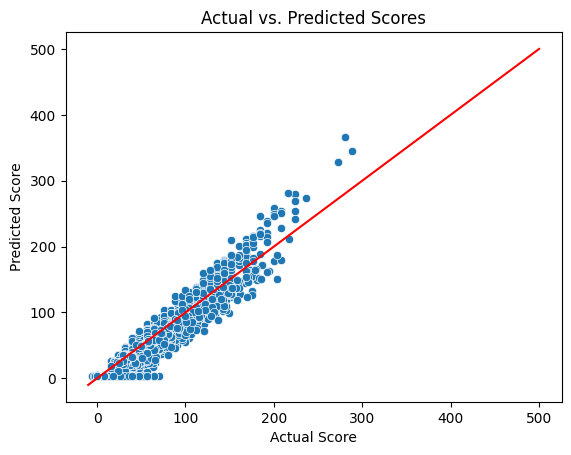

In [37]:
train_nn(X,y,6)